<a href="https://colab.research.google.com/github/thasliya0404/class-activity/blob/main/Unsupervisedlearningcasestudy_thasliya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/adult_dataset.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K.
48838,64.0,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40.0,United-States,<=50K.
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K.
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [ ]:
df.isna().sum()

,0
age,2442
workclass,3362
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0


In [ ]:
df.duplicated().sum()

np.int64(16)

In [ ]:
df=df.drop_duplicates()

In [ ]:
num_cols=df.select_dtypes(np.number)
num_cols

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39.0,77516,13,2174,0,40.0
1,50.0,83311,13,0,0,13.0
2,38.0,215646,9,0,0,40.0
3,53.0,234721,7,0,0,40.0
4,28.0,338409,13,0,0,40.0
...,...,...,...,...,...,...
48837,39.0,215419,13,0,0,36.0
48838,64.0,321403,9,0,0,40.0
48839,38.0,374983,13,0,0,50.0
48840,44.0,83891,13,5455,0,40.0


In [ ]:
cat_cols=df.select_dtypes(include=['object'])
cat_cols

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,NaN,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K.
48838,NaN,HS-grad,Widowed,NaN,Other-relative,Black,Male,United-States,<=50K.
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K.


In [ ]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', '?', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [ ]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', nan,
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['occupation']=df['occupation'].replace('?',np.nan)

/tmp/ipython-input-73246045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation']=df['occupation'].replace('?',np.nan)


In [ ]:
df['workclass']=df['workclass'].replace('?',np.nan)

/tmp/ipython-input-454814448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass']=df['workclass'].replace('?',np.nan)


In [ ]:
df=df.replace('?',np.nan)

In [ ]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,5851
Craft-repair,5790
Exec-managerial,5770
Adm-clerical,5328
Sales,5231
Other-service,4654
Machine-op-inspct,2872
Transport-moving,2238
Handlers-cleaners,1976


In [ ]:
df['workclass'].value_counts()

,count
workclass,
Private,32205
Self-emp-not-inc,3649
Local-gov,2973
State-gov,1877
Self-emp-inc,1624
Federal-gov,1346
Without-pay,18
Never-worked,9


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

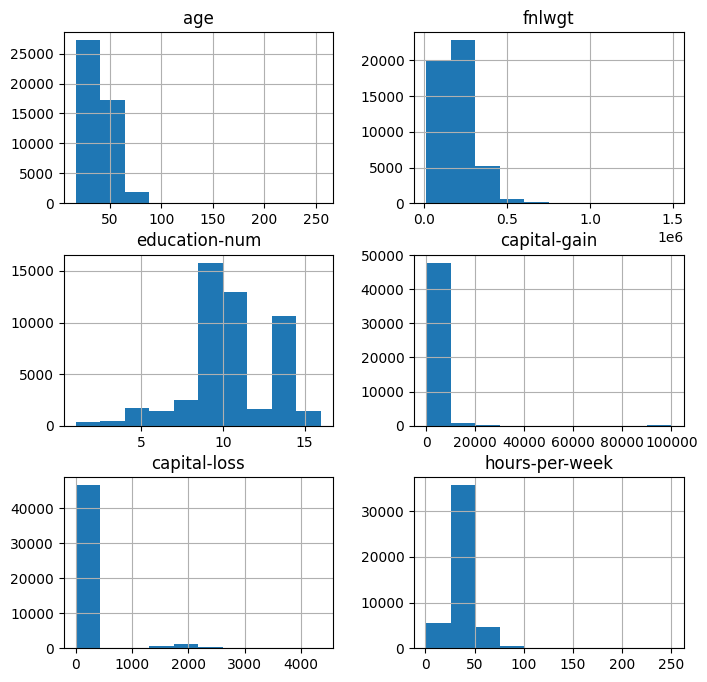

In [ ]:
num_cols.hist(figsize=(8,8))

In [ ]:
num_cols.median()

,0
age,37.0
fnlwgt,178138.5
education-num,10.0
capital-gain,0.0
capital-loss,0.0
hours-per-week,40.0


In [ ]:
num_cols.fillna(num_cols.median())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39.0,77516,13,2174,0,40.0
1,50.0,83311,13,0,0,13.0
2,38.0,215646,9,0,0,40.0
3,53.0,234721,7,0,0,40.0
4,28.0,338409,13,0,0,40.0
...,...,...,...,...,...,...
48837,39.0,215419,13,0,0,36.0
48838,64.0,321403,9,0,0,40.0
48839,38.0,374983,13,0,0,50.0
48840,44.0,83891,13,5455,0,40.0


In [ ]:
cat_cols.mode()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K


In [ ]:
cat_cols.fillna(cat_cols.mode())

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K.
48838,NaN,HS-grad,Widowed,NaN,Other-relative,Black,Male,United-States,<=50K.
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K.


In [ ]:
df[num_cols.columns] = num_cols.fillna(num_cols.median())
df[cat_cols.columns] = cat_cols.fillna(cat_cols.mode().iloc[0])
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


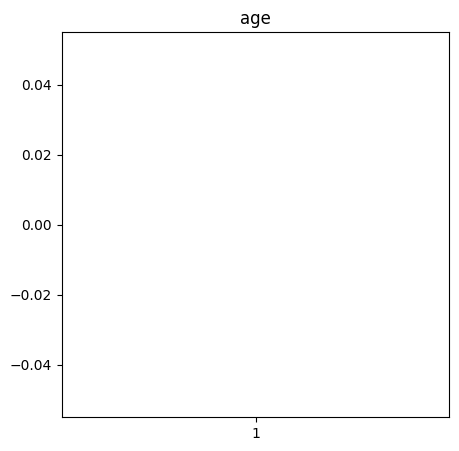

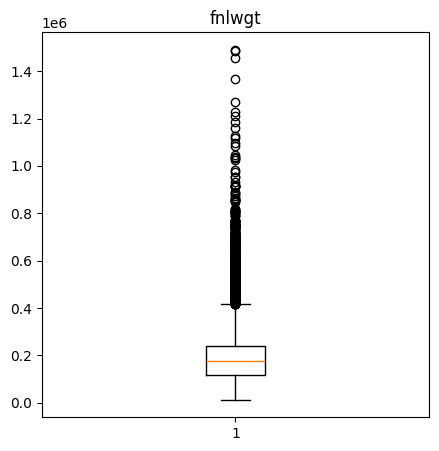

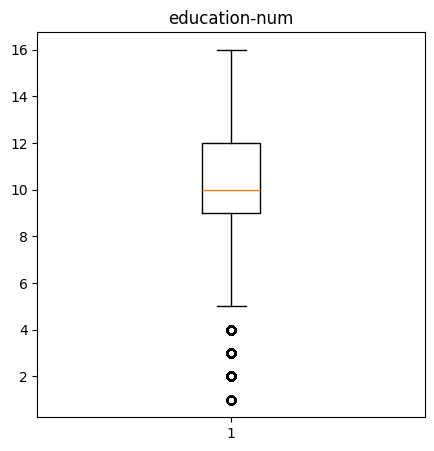

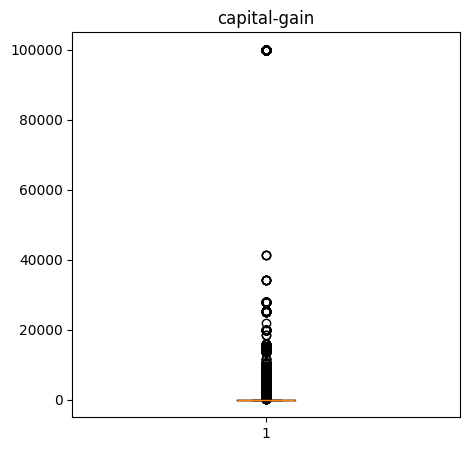

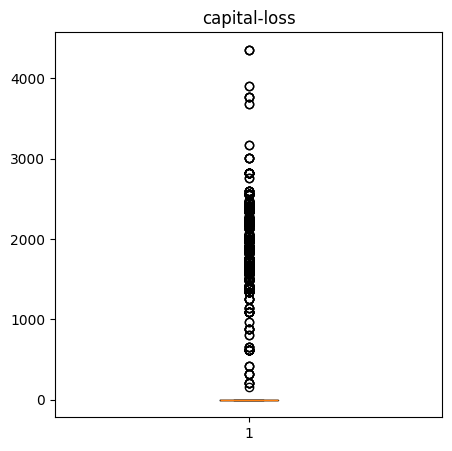

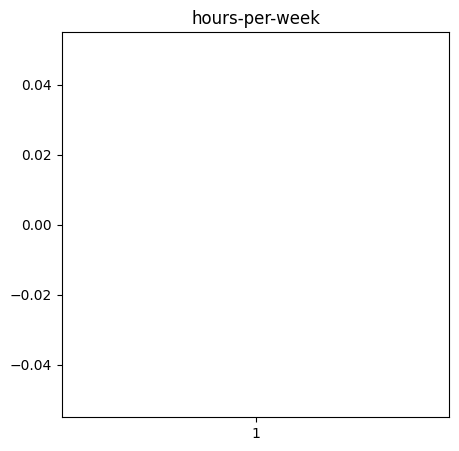

In [ ]:
for i in num_cols:
  plt.figure(figsize=(5,5))
  plt.boxplot(num_cols[i])
  plt.title(i)

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
for col in num_cols.columns:
    df[col] = winsorize(df[col], limits=(0.01, 0.01))

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

In [ ]:
lab_enc = LabelEncoder()
for col in cat_cols.columns:
  df[col] = lab_enc.fit_transform(df[col])

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,7,77516,9,13,4,1,1,4,1,2174,0,40.0,39,0
1,50.0,6,83311,9,13,2,4,0,4,1,0,0,13.0,39,0
2,38.0,4,215646,11,9,0,6,1,4,1,0,0,40.0,39,0
3,53.0,4,234721,1,7,2,6,0,2,1,0,0,40.0,39,0
4,28.0,4,338409,9,13,2,10,5,2,0,0,0,40.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,4,215419,9,13,0,10,1,4,0,0,0,36.0,39,1
48838,64.0,4,321403,11,9,6,10,2,2,1,0,0,40.0,39,1
48839,38.0,4,374983,9,13,2,10,0,4,1,0,0,50.0,39,1
48840,44.0,4,83891,9,13,0,1,3,1,1,5455,0,40.0,39,1


In [ ]:
scaler=MinMaxScaler()
for col in num_cols.columns:
  df[col]=scaler.fit_transform(df[[col]])

In [ ]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.020857,-0.076780,-0.013875,0.033622,-0.263014,-0.012499,-0.258939,0.028539,0.087310,0.120949,0.053706,0.075557,-0.003929,0.201888
workclass,0.020857,1.000000,-0.019548,0.019300,0.040372,-0.051718,0.183553,-0.078432,0.050209,0.082976,0.027496,0.010225,0.104178,-0.004158,0.070353
fnlwgt,-0.076780,-0.019548,1.000000,-0.022345,-0.038501,0.030518,0.000113,0.007595,-0.023731,0.029935,-0.002962,-0.002943,-0.011559,-0.052045,-0.005859
education,-0.013875,0.019300,-0.022345,1.000000,0.360457,-0.037419,-0.019996,-0.010781,0.013358,-0.027011,0.033764,0.018125,0.057756,0.066150,0.068586
education-num,0.033622,0.040372,-0.038501,0.360457,1.000000,-0.069708,0.095019,-0.091884,0.028885,0.009889,0.169152,0.081634,0.144622,0.056052,0.292562
marital-status,-0.263014,-0.051718,0.030518,-0.037419,-0.069708,1.000000,-0.000327,0.187799,-0.070111,-0.127458,-0.069088,-0.035759,-0.182588,-0.020043,-0.171421
occupation,-0.012499,0.183553,0.000113,-0.019996,0.095019,-0.000327,1.000000,-0.058062,0.001819,0.061519,0.022101,0.017167,0.042401,-0.006885,0.083281
relationship,-0.258939,-0.078432,0.007595,-0.010781,-0.091884,0.187799,-0.058062,1.000000,-0.117067,-0.579941,-0.086219,-0.059751,-0.248990,-0.003867,-0.223479
race,0.028539,0.050209,-0.023731,0.013358,0.028885,-0.070111,0.001819,-0.117067,1.000000,0.086842,0.023275,0.018511,0.037115,0.129097,0.064019
sex,0.087310,0.082976,0.029935,-0.027011,0.009889,-0.127458,0.061519,-0.579941,0.086842,1.000000,0.071693,0.047468,0.227378,-0.009388,0.187176


In [ ]:
x=df[['age','education','occupation','capital-gain','hours-per-week']]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
wcss

[1562324.4515942573,
 917389.186197113,
 521902.94119319774,
 435168.261802948,
 368072.73669853946,
 266318.85692469915,
 248972.95912415884,
 197094.97897752354,
 175813.72621228872,
 157729.54203137686]

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=42)
labels=kmeans.fit_predict(x)
score=silhouette_score(x,labels)
print('Silhouette score:',score)

Silhouette score: 0.4866941301873972


Text(0.5, 0, 'no.of clusters')

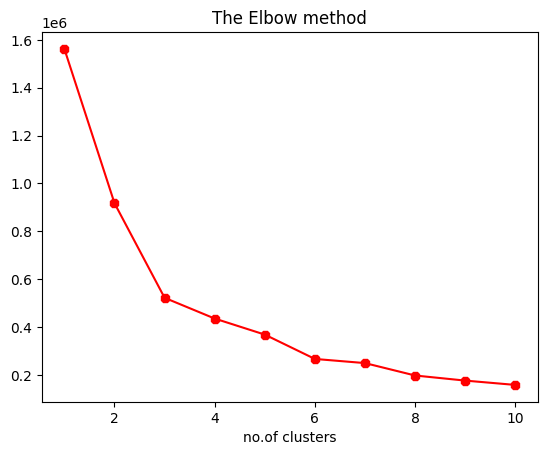

In [ ]:
plt.plot(range(1,11),wcss,color='red',marker='8')
plt.title('The Elbow method')
plt.xlabel('no.of clusters')

In [ ]:
df1=df.copy()

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(x)
df1['Cluster']=kmeans.predict(x)
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster
0,0.385965,7,0.104388,9,0.769231,4,1,1,4,1,0.144702,0.0,0.444444,39,0,2
1,0.578947,6,0.116403,9,0.769231,2,4,0,4,1,0.000000,0.0,0.069444,39,0,2
2,0.368421,4,0.390767,11,0.461538,0,6,1,4,1,0.000000,0.0,0.444444,39,0,2
3,0.631579,4,0.430314,1,0.307692,2,6,0,2,1,0.000000,0.0,0.444444,39,0,0
4,0.192982,4,0.645285,9,0.769231,2,10,5,2,0,0.000000,0.0,0.444444,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.385965,4,0.390296,9,0.769231,0,10,1,4,0,0.000000,0.0,0.388889,39,1,1
48838,0.824561,4,0.610027,11,0.461538,6,10,2,2,1,0.000000,0.0,0.444444,39,1,1
48839,0.368421,4,0.721112,9,0.769231,2,10,0,4,1,0.000000,0.0,0.583333,39,1,1
48840,0.473684,4,0.117605,9,0.769231,0,1,3,1,1,0.363086,0.0,0.444444,39,1,2


In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(x)
df1['Cluster']=kmeans.labels_
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster
0,0.385965,7,0.104388,9,0.769231,4,1,1,4,1,0.144702,0.0,0.444444,39,0,2
1,0.578947,6,0.116403,9,0.769231,2,4,0,4,1,0.000000,0.0,0.069444,39,0,2
2,0.368421,4,0.390767,11,0.461538,0,6,1,4,1,0.000000,0.0,0.444444,39,0,2
3,0.631579,4,0.430314,1,0.307692,2,6,0,2,1,0.000000,0.0,0.444444,39,0,0
4,0.192982,4,0.645285,9,0.769231,2,10,5,2,0,0.000000,0.0,0.444444,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.385965,4,0.390296,9,0.769231,0,10,1,4,0,0.000000,0.0,0.388889,39,1,1
48838,0.824561,4,0.610027,11,0.461538,6,10,2,2,1,0.000000,0.0,0.444444,39,1,1
48839,0.368421,4,0.721112,9,0.769231,2,10,0,4,1,0.000000,0.0,0.583333,39,1,1
48840,0.473684,4,0.117605,9,0.769231,0,1,3,1,1,0.363086,0.0,0.444444,39,1,2


In [ ]:
df1['Cluster'].unique()

array([2, 0, 1], dtype=int32)

In [ ]:
kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [ ]:
df1['Cluster'].value_counts()

,count
Cluster,
1,23194
2,19464
0,6168


In [ ]:
kmeans.cluster_centers_

array([[ 0.36465231,  2.37094682,  6.87354086,  0.01345767,  0.39914568],
       [ 0.37274915, 11.40536346, 10.37660602,  0.04643372,  0.45312844],
       [ 0.38740166, 11.46681052,  2.86112824,  0.04492069,  0.46081798]])

In [ ]:
cluster_summary=df1.groupby('Cluster')[['age','education','occupation',
      'capital-gain','hours-per-week']].mean()
cluster_summary

,age,education,occupation,capital-gain,hours-per-week
Cluster,,,,,
0,0.364652,2.370947,6.873541,0.013458,0.399146
1,0.372749,11.405363,10.376606,0.046434,0.453128
2,0.387402,11.466811,2.861128,0.044921,0.460818


In [ ]:
cluster_labels={0:'Highly Educated,Long hours,Mid aged',1:'Moderate Education,High Occupation,Highly aged',
                2:'Highly Educated,Premium Occupation,Low hours,Younger'}
df1['Customer group']=df1['Cluster'].map(cluster_labels)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster,Customer group
0,0.385965,7,0.104388,9,0.769231,4,1,1,4,1,0.144702,0.0,0.444444,39,0,2,"Highly Educated,Premium Occupation,Low hours,Y..."
1,0.578947,6,0.116403,9,0.769231,2,4,0,4,1,0.000000,0.0,0.069444,39,0,2,"Highly Educated,Premium Occupation,Low hours,Y..."
2,0.368421,4,0.390767,11,0.461538,0,6,1,4,1,0.000000,0.0,0.444444,39,0,2,"Highly Educated,Premium Occupation,Low hours,Y..."
3,0.631579,4,0.430314,1,0.307692,2,6,0,2,1,0.000000,0.0,0.444444,39,0,0,"Highly Educated,Long hours,Mid aged"
4,0.192982,4,0.645285,9,0.769231,2,10,5,2,0,0.000000,0.0,0.444444,5,0,1,"Moderate Education,High Occupation,Highly aged"


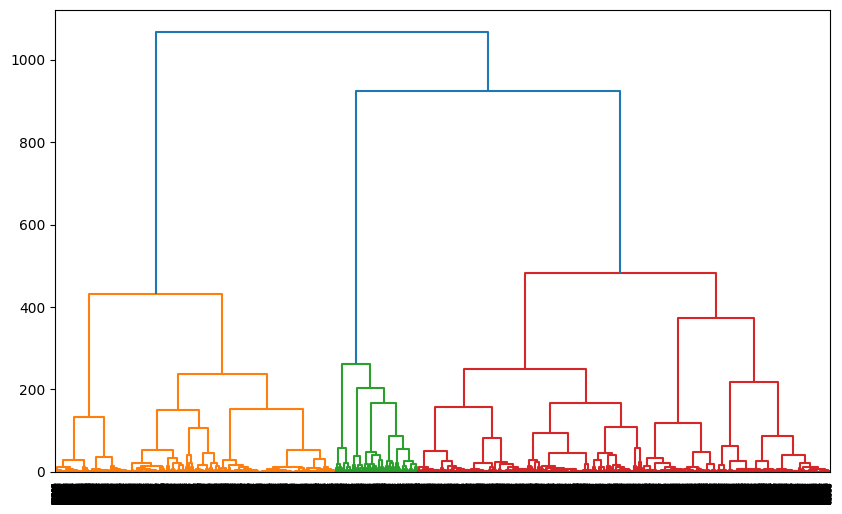

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
mergings=linkage(x,method='ward')
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [ ]:
scaler=StandardScaler()
for col in num_cols.columns:
  df[col]=scaler.fit_transform(df[[col]])

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)
new_customer=np.array([[39,9,1,2174,40.0]])
new_customer_scaled=scaler.transform(new_customer)
cluster_label=kmeans.predict(new_customer_scaled)
print(cluster_label[0])

2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
df1['Cluster'].value_counts()

,count
Cluster,
1,23194
2,19464
0,6168


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg_hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
new_cluster_label=agg_hc.fit_predict(x)
new_cluster_label

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
score=silhouette_score(x,new_cluster_label)
score

np.float64(0.46265105554159563)

In [ ]:
df1['agg_hc_cluster']=new_cluster_label
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster,Customer group,agg_hc_cluster
0,0.385965,7,0.104388,9,0.769231,4,1,1,4,1,0.144702,0.0,0.444444,39,0,2,"Highly Educated,Premium Occupation,Low hours,Y...",1
1,0.578947,6,0.116403,9,0.769231,2,4,0,4,1,0.000000,0.0,0.069444,39,0,2,"Highly Educated,Premium Occupation,Low hours,Y...",1
2,0.368421,4,0.390767,11,0.461538,0,6,1,4,1,0.000000,0.0,0.444444,39,0,2,"Highly Educated,Premium Occupation,Low hours,Y...",0
3,0.631579,4,0.430314,1,0.307692,2,6,0,2,1,0.000000,0.0,0.444444,39,0,0,"Highly Educated,Long hours,Mid aged",2
4,0.192982,4,0.645285,9,0.769231,2,10,5,2,0,0.000000,0.0,0.444444,5,0,1,"Moderate Education,High Occupation,Highly aged",0


In [ ]:
df1['agg_hc_cluster'].value_counts()

,count
agg_hc_cluster,
0,25934
1,17703
2,5189


In [ ]:
y=df[['age', 'sex', 'race', 'education-num', 'native-country','workclass',
       'hours-per-week', 'capital-gain']]

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(y)
  wcss.append(kmeans.inertia_)
wcss

[2793761.4509687424,
 684331.7800743693,
 402754.6625892343,
 381727.6195191045,
 341030.1156452807,
 307232.0032680596,
 267365.984117408,
 239346.0668346599,
 222516.11866969452,
 204661.01161522337]

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=42)
labels=kmeans.fit_predict(y)
score=silhouette_score(y,labels)
print('Silhouette score:',score)

Silhouette score: 0.7459934250731639


In [ ]:
kmeans=KMeans(n_clusters=2,random_state=42)
labels=kmeans.fit_predict(y)
score=silhouette_score(y,labels)
print('Silhouette score:',score)

Silhouette score: 0.8530595185166052


Text(0.5, 0, 'no.of clusters')

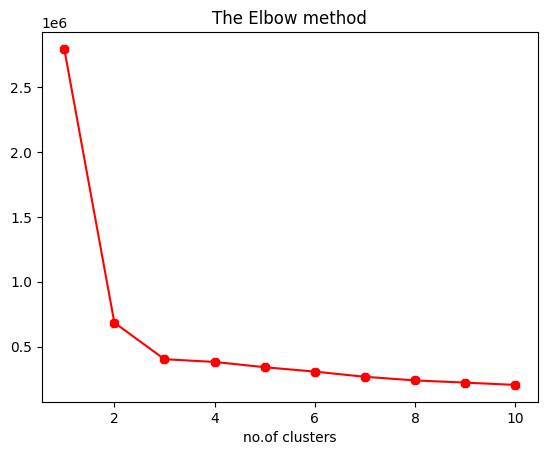

In [ ]:
plt.plot(range(1,11),wcss,color='red',marker='8')
plt.title('The Elbow method')
plt.xlabel('no.of clusters')

In [ ]:
df2=df.copy()

In [ ]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
kmeans.fit(x)
df2['Cluster']=kmeans.predict(x)
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster
0,0.036165,7,-1.112118,9,1.144684,4,1,1,4,1,0.618641,-0.219153,-0.030395,39,0,0
1,0.867259,6,-1.054011,9,1.144684,2,4,0,4,1,-0.250159,-0.219153,-2.342425,39,0,0
2,-0.039389,4,0.272942,11,-0.426991,0,6,1,4,1,-0.250159,-0.219153,-0.030395,39,0,0
3,1.093921,4,0.464212,1,-1.212829,2,6,0,2,1,-0.250159,-0.219153,-0.030395,39,0,0
4,-0.794930,4,1.503915,9,1.144684,2,10,5,2,0,-0.250159,-0.219153,-0.030395,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.036165,4,0.270666,9,1.144684,0,10,1,4,0,-0.250159,-0.219153,-0.372918,39,1,1
48838,1.925016,4,1.333392,11,-0.426991,6,10,2,2,1,-0.250159,-0.219153,-0.030395,39,1,1
48839,-0.039389,4,1.870651,9,1.144684,2,10,0,4,1,-0.250159,-0.219153,0.825912,39,1,1
48840,0.413935,4,-1.048195,9,1.144684,0,1,3,1,1,1.929833,-0.219153,-0.030395,39,1,0


In [ ]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
kmeans.fit(x)
df2['Cluster']=kmeans.labels_
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster
0,0.036165,7,-1.112118,9,1.144684,4,1,1,4,1,0.618641,-0.219153,-0.030395,39,0,0
1,0.867259,6,-1.054011,9,1.144684,2,4,0,4,1,-0.250159,-0.219153,-2.342425,39,0,0
2,-0.039389,4,0.272942,11,-0.426991,0,6,1,4,1,-0.250159,-0.219153,-0.030395,39,0,0
3,1.093921,4,0.464212,1,-1.212829,2,6,0,2,1,-0.250159,-0.219153,-0.030395,39,0,0
4,-0.794930,4,1.503915,9,1.144684,2,10,5,2,0,-0.250159,-0.219153,-0.030395,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.036165,4,0.270666,9,1.144684,0,10,1,4,0,-0.250159,-0.219153,-0.372918,39,1,1
48838,1.925016,4,1.333392,11,-0.426991,6,10,2,2,1,-0.250159,-0.219153,-0.030395,39,1,1
48839,-0.039389,4,1.870651,9,1.144684,2,10,0,4,1,-0.250159,-0.219153,0.825912,39,1,1
48840,0.413935,4,-1.048195,9,1.144684,0,1,3,1,1,1.929833,-0.219153,-0.030395,39,1,0


In [ ]:
df2['Cluster'].unique()

array([0, 1], dtype=int32)

In [ ]:
df2['Cluster'].value_counts()

,count
Cluster,
1,26761
0,22065


In [ ]:
kmeans.cluster_centers_

array([[ 0.38559122, 10.39215953,  2.93695898,  0.04168509,  0.45677732],
       [ 0.37095157, 10.20316879, 10.23713613,  0.04164813,  0.44327047]])

In [ ]:
cluster_summary=df2.groupby('Cluster')[['age','education-num',
      'capital-gain','hours-per-week','native-country','workclass', 'sex', 'race']].mean()
cluster_summary

,age,education-num,capital-gain,hours-per-week,native-country,workclass,sex,race
Cluster,,,,,,,,
0,0.034555,-0.075848,0.000122,0.045642,37.274915,3.812826,0.697666,3.699524
1,-0.028492,0.062539,-0.000100,-0.037633,36.890363,4.063899,0.644483,3.642016


In [ ]:
cluster_labels={0:'Older, Lower educated, higher capital gain, works longer hours',1:'Younger, Higher education years, low capital gain, fewer hours/week'}
df2['Customer group']=df2['Cluster'].map(cluster_labels)
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster,Customer group
0,0.036165,7,-1.112118,9,1.144684,4,1,1,4,1,0.618641,-0.219153,-0.030395,39,0,0,"Older, Lower educated, higher capital gain, wo..."
1,0.867259,6,-1.054011,9,1.144684,2,4,0,4,1,-0.250159,-0.219153,-2.342425,39,0,0,"Older, Lower educated, higher capital gain, wo..."
2,-0.039389,4,0.272942,11,-0.426991,0,6,1,4,1,-0.250159,-0.219153,-0.030395,39,0,0,"Older, Lower educated, higher capital gain, wo..."
3,1.093921,4,0.464212,1,-1.212829,2,6,0,2,1,-0.250159,-0.219153,-0.030395,39,0,0,"Older, Lower educated, higher capital gain, wo..."
4,-0.794930,4,1.503915,9,1.144684,2,10,5,2,0,-0.250159,-0.219153,-0.030395,5,0,1,"Younger, Higher education years, low capital g..."


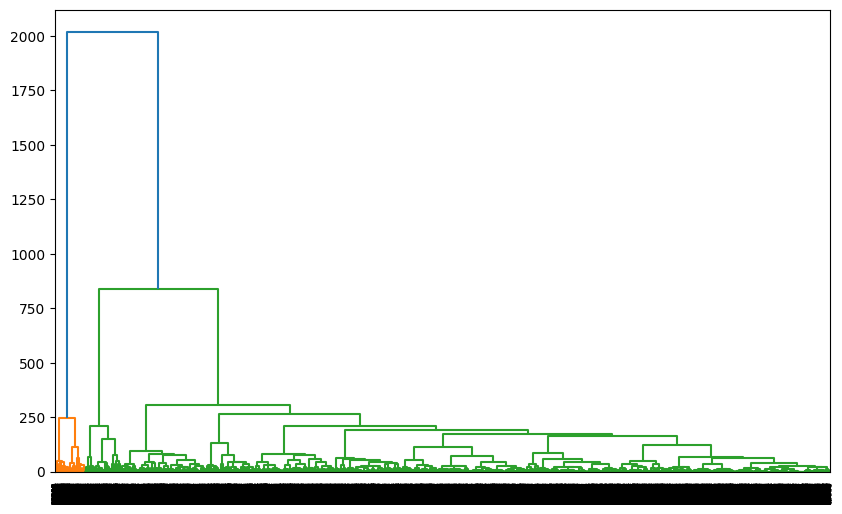

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
mergings=linkage(y,method='ward')
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_hc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
new_cluster_label=agg_hc.fit_predict(y)
new_cluster_label

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
score=silhouette_score(y,new_cluster_label)
score

np.float64(0.8593390341662279)

In [ ]:
agg_hc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
new_cluster_label=agg_hc.fit_predict(y)
new_cluster_label

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
score=silhouette_score(y,new_cluster_label)
score

np.float64(0.8593390341662279)

In [ ]:
df2['agg_hc_cluster']=new_cluster_label
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster,Customer group,agg_hc_cluster
0,0.036165,7,-1.112118,9,1.144684,4,1,1,4,1,0.618641,-0.219153,-0.030395,39,0,0,"Older, Lower educated, higher capital gain, wo...",0
1,0.867259,6,-1.054011,9,1.144684,2,4,0,4,1,-0.250159,-0.219153,-2.342425,39,0,0,"Older, Lower educated, higher capital gain, wo...",0
2,-0.039389,4,0.272942,11,-0.426991,0,6,1,4,1,-0.250159,-0.219153,-0.030395,39,0,0,"Older, Lower educated, higher capital gain, wo...",0
3,1.093921,4,0.464212,1,-1.212829,2,6,0,2,1,-0.250159,-0.219153,-0.030395,39,0,0,"Older, Lower educated, higher capital gain, wo...",0
4,-0.794930,4,1.503915,9,1.144684,2,10,5,2,0,-0.250159,-0.219153,-0.030395,5,0,1,"Younger, Higher education years, low capital g...",1


In [ ]:
df2['agg_hc_cluster'].value_counts()

,count
agg_hc_cluster,
0,46895
1,1931


In [ ]:
df2['Cluster'].value_counts()

,count
Cluster,
1,26761
0,22065


3 clusters are more efficient than 2 clusters

Age, Education, working hours, and capital gain are the most influential variables separating the two clusters.

The clustering successfully distinguishes between lower-income and higher-income potential groups, even without using the actual income column.

Demographic factors such as sex, race and country also contribute but are less decisive than hours per week, age and education features.

The 2-cluster segmentation provides a simple but meaningful socioeconomic split in the population.